In [110]:
import pandas as pd

base = pd.read_csv("house_prices.csv")

x = base.iloc[:,5].values
x = x.reshape(-1,1)
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [111]:
base.head().iloc[:,5:6]
# print(base.iloc[:,2:3].values)

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [112]:
y = base.iloc[:,2:3].values
y.shape


(21613, 1)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(y)

In [114]:
X

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [115]:
Y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

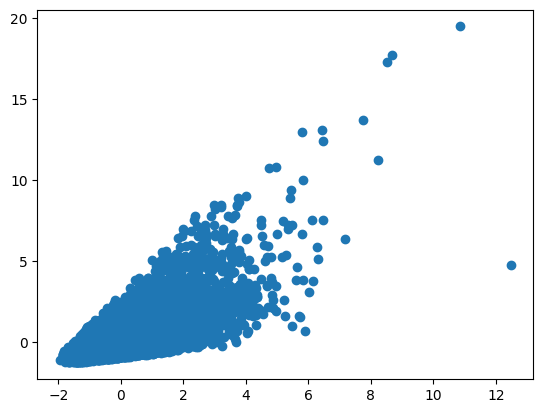

In [116]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

# Formula
y = b0+b1*x

In [117]:
import numpy as np
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [118]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
b0  = tf.Variable(0.41)
b1 = tf.Variable(0.72)
batch_size = 32
xph = tf.compat.v1.placeholder(tf.float32,[batch_size,1])
yph = tf.compat.v1.placeholder(tf.float32,[batch_size,1])

In [119]:



y_modelo = b0 + b1 * xph

erro = tf.losses.mean_squared_error(yph,y_modelo)
itimizador = tf.compat.v1.train.GradientDescentOptimizer(learning_rate= 0.001)
treinado = itimizador.minimize(erro)
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess :
    sess.run(init)
    for i in range(10000):
        indices = np.random.randint(len(x),size = batch_size)
        feed = {xph:X[indices],yph:Y[indices]}
        sess.run(treinado, feed_dict=feed)
    b0_final,b1_final = sess.run([b0,b1])
    

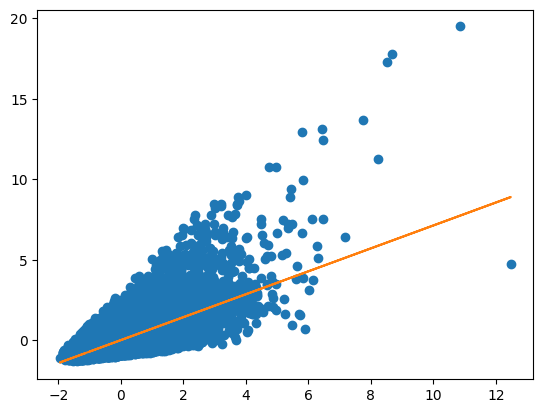

In [120]:
previsoes = b0_final + b1_final * X
plt.plot(X,Y,'o')
plt.plot(X,previsoes)

In [121]:
y1 = scaler_y.inverse_transform(Y)
previsoes1 = scaler_y.inverse_transform(previsoes)


In [122]:
y1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [123]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1,previsoes1)
mae

174708.02075319903